#Cyfrowe przetwarzanie sygnałów i obrazów  -  Laboratorium 2
Daria Jeżowska, 252731 <br/>
Szymon Hutnik, 252736 <br/>

# Ćwiczenie 5
Napisz skrypt w Pythonie/Matlabie umozliwiajacy wczytywanie i wizualizacje badanych obrazów. Program powinien umozliwiać:

1.   wyświetlanie obrazu wczytanego z pliku o podanej nazwie
2.  sporządzenie wykresów zmian poziomu szarosci wzdłuz wybranej linii poziomej lub pionowej o zadanej współrzednej
3.   wybór podobrazu (prostokątnego obszaru) o podanych współrzednych oraz jego zapis do pliku o zadanej nazwie




In [ ]:
%matplotlib inline

import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image

##Część 1

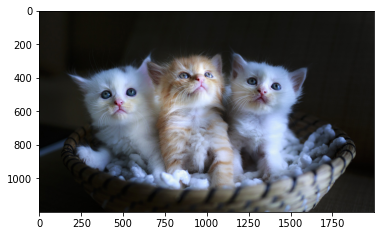

In [ ]:
fileName = '/content/Słodkie-kotki-dlaczego-kocięta-są-takie-słodkie.jpg'
image = Image.open(fileName)
plt.imshow(image)


##Część 2

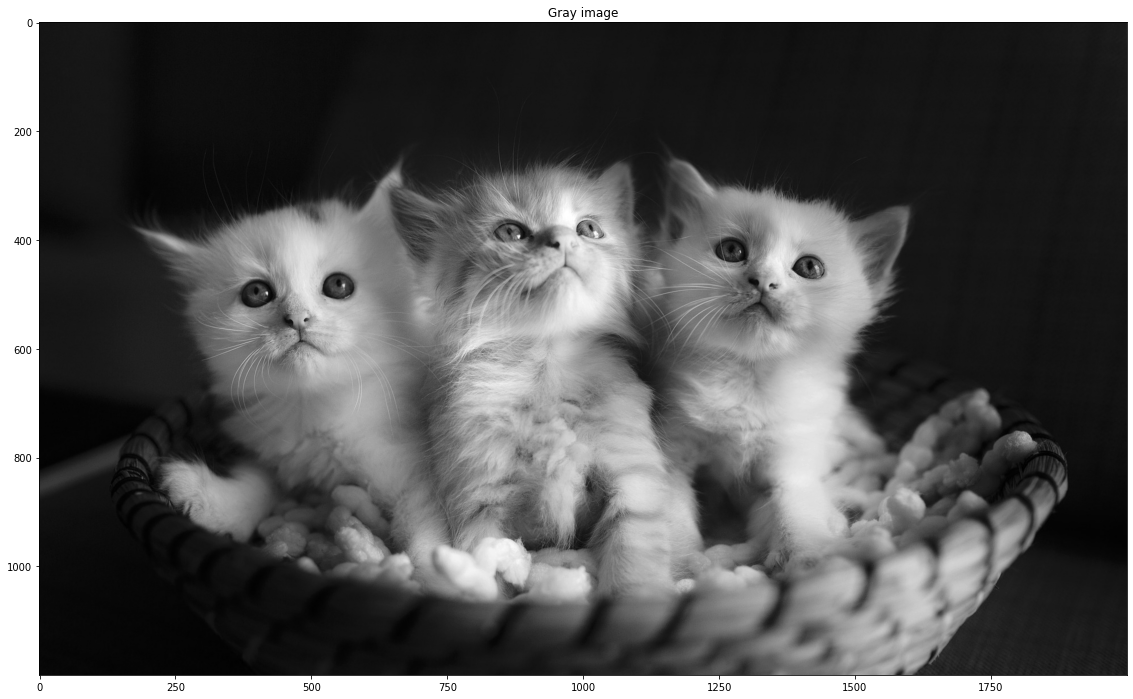

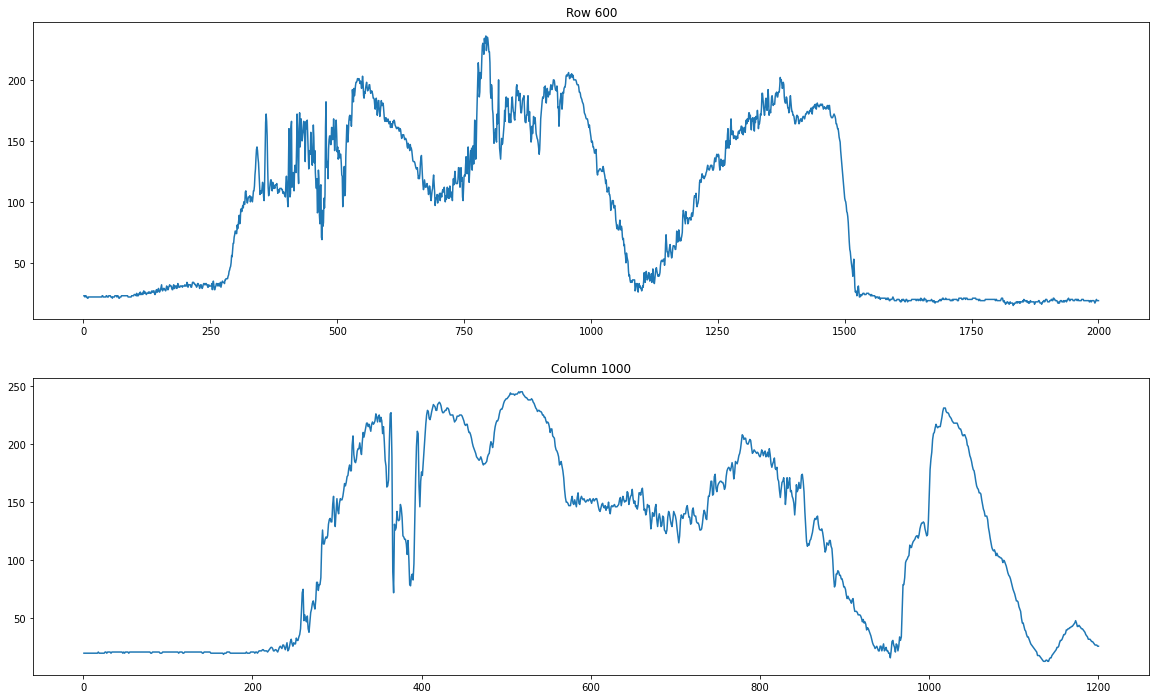

In [ ]:
imageGray = np.asarray(image.convert('L'))
column = 1000
row = 600

plt.figure(figsize = [20, 12])
plt.title('Gray image')
plt.imshow(imageGray, cmap='gray', vmin=0, vmax=255)

plt.figure(figsize = [20, 12])
plt.subplot(2, 1, 1)
plt.title(f'Row {row}')
plt.plot(np.arange(1, len(imageGray[row, :]) + 1, 1), imageGray[row, :])

plt.subplot(2, 1, 2)
plt.title('Column 1000')
plt.plot(np.arange(1, len(imageGray[:, column]) + 1, 1), imageGray[:, column])
plt.show()



##Część 3

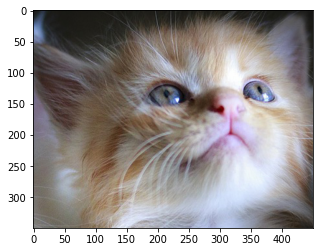

In [ ]:
#imageCropped = (np.asarray(image))[250:600, 650:1100]
imageCropped = image.crop([650, 250, 1100, 600])
plt.imshow(imageCropped)
imageCropped.save('/content/Słodkie-kotki-dlaczego-kocięta-są-takie-słodkie-mini.jpg')

# Ćwiczenie 6
Przekształcenie punktowe T obrazu ma ogólną postać s = T(r), gdzie r, s oznaczają odpowiednio poziom szarości piksela obrazu wejściowego i wyjściowego. <br>
Zaobserwuj działanie nastepujacych przekształcen punktowych na przykładowych obrazach:

1.   Mnożenie obrazu przez stałą T(r) = c · r, gdzie c jest stałą.
2.   Zmianę dynamiki skali szarości (kontrastu). Możesz zastosować transformację
o postaci T(r) = 1 /(1 + (m/r)^e) gdzie m i e są ustalonymi parametrami przekształcenia (np. m = 0,45, e = 8).
Wykreśl T(r), by lepiej uwidocznić wpływ T na kontrast obrazu wyjściowego.
Przeprowadź eksperymenty z różnymi wartościami parametrów m i e
3.  Korekcję gamma, zdefiniowaną jako s = c · r^γ, gdzie c > 0 i γ > 0 są stałymi we wzorze przekształcenia.





In [14]:
%matplotlib inline

import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image

## Część 1

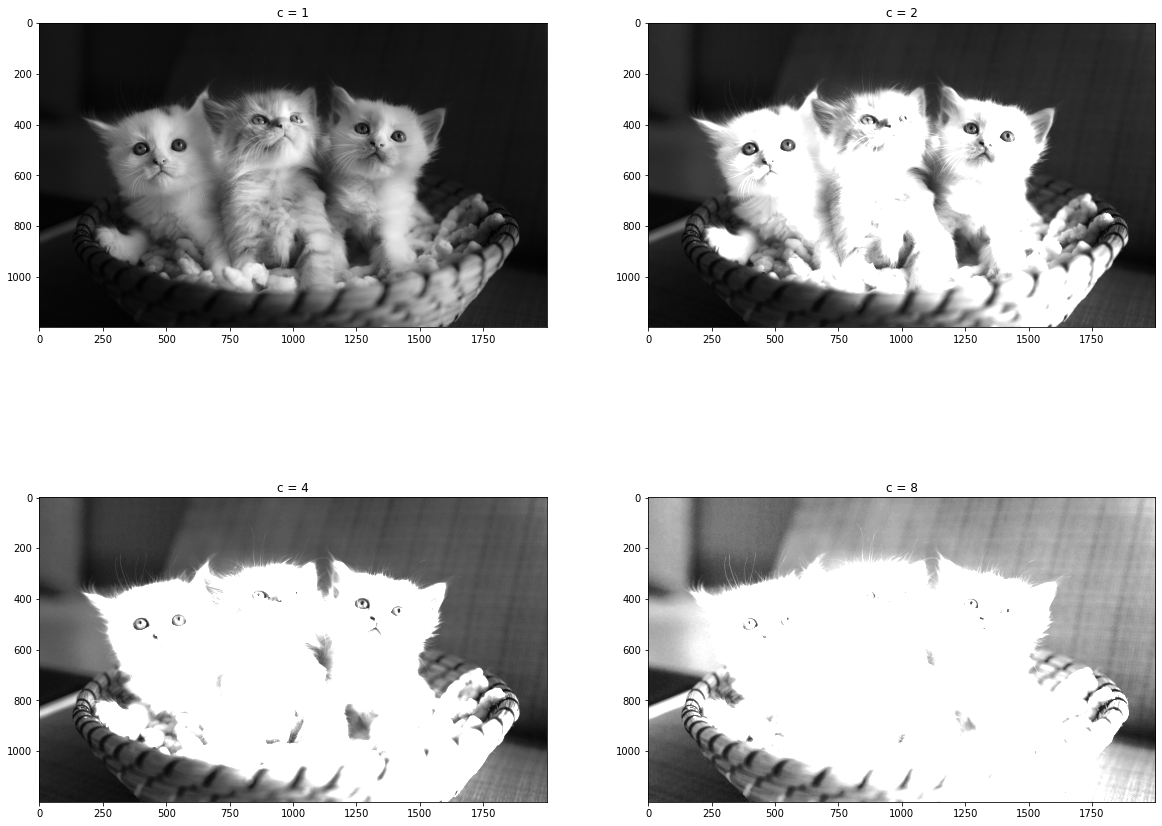

In [17]:
fileName = '/content/Słodkie-kotki-dlaczego-kocięta-są-takie-słodkie.jpg'
image = Image.open(fileName)
imageGray = np.asarray(image.convert('L'))
imageGray = imageGray * 1.0 # convert to float


plt.figure(figsize = [20, 16])

plt.subplot(2, 2, 1)
plt.title('c = 1')
plt.imshow(imageGray, cmap = 'gray', vmin = 0, vmax = 255)

plt.subplot(2, 2, 2)
plt.title('c = 2')
plt.imshow(imageGray * 2, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 3)
plt.title('c = 4') 
plt.imshow(imageGray * 4, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 4)
plt.title('c = 8')
plt.imshow(imageGray * 8, cmap = 'gray', vmin = 0, vmax=255)

plt.show()

## Część 2
Możemy zauważyć, że parametr m ma wpływ na jasność obrazu, wraz ze wzrostem
parametru m obraz jest ciemniejszy. Parametr e wpływa na kontrast obrazu


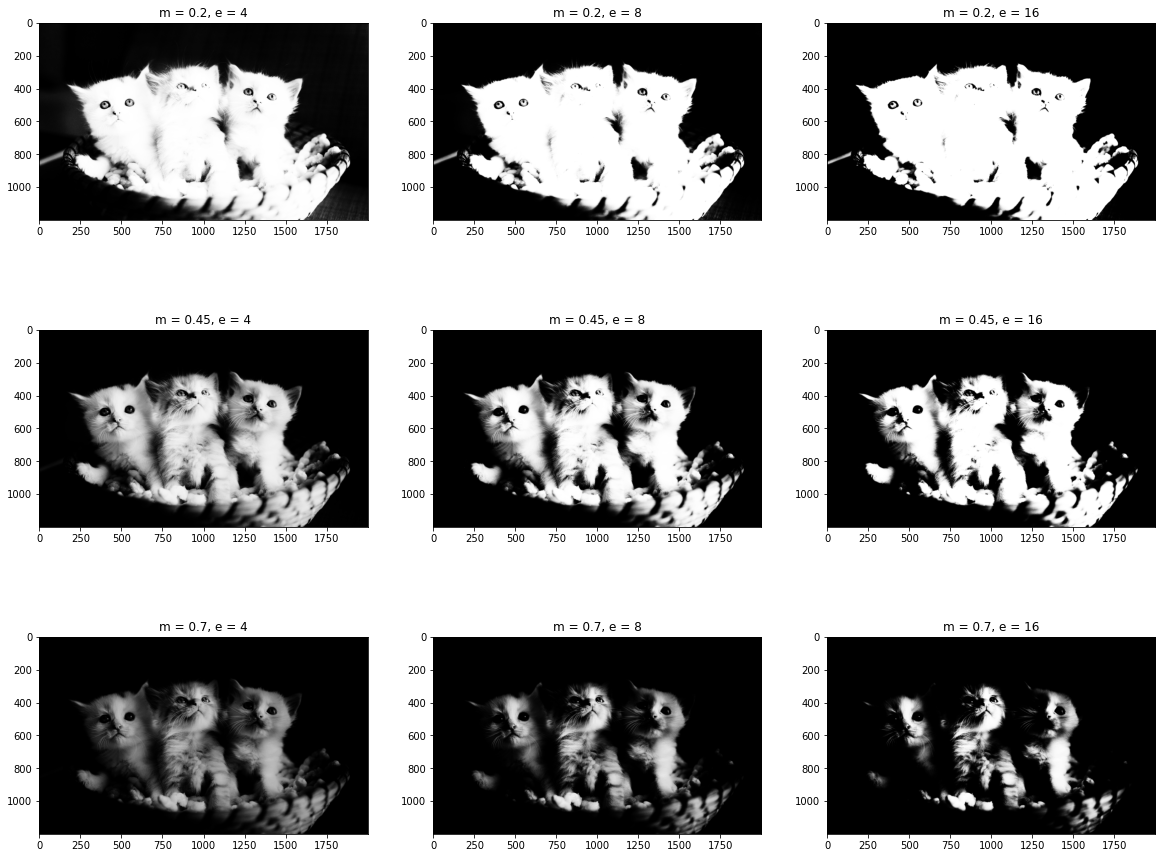

In [20]:
imageGray = np.asarray(image.convert('L'))
imageGray = imageGray * 1.0
imageGray = np.maximum(imageGray, 0.1)

# divide imageGray by 255 to make sure results stay in 0 - 255 range
imageGray = imageGray / 255
# we modify equation to  T(r) = 255 /(1 + (m/imageGray)^e) 
# not sure if 1 is needed
plt.figure(figsize = [20, 16])

plt.subplot(3, 3, 1)
plt.title('m = 0.2, e = 4')
plt.imshow((255 / (1 + np.power(0.2 / imageGray, 4))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 2)
plt.title('m = 0.2, e = 8')
plt.imshow((255 / (1 + np.power(0.2 / imageGray, 8))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 3)
plt.title('m = 0.2, e = 16')
plt.imshow((255 / (1 + np.power(0.2 / imageGray, 16))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 4)
plt.title('m = 0.45, e = 4')
plt.imshow((255 / (1 + np.power(0.45 / imageGray, 4))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 5)
plt.title('m = 0.45, e = 8')
plt.imshow((255 / (1 + np.power(0.45 / imageGray, 8))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 6 )
plt.title('m = 0.45, e = 16')
plt.imshow((255 / (1 + np.power(0.45 / imageGray, 16))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 7)
plt.title('m = 0.7, e = 4')
plt.imshow((255 / (1 + np.power(0.7 / imageGray, 4))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 8)
plt.title('m = 0.7, e = 8')
plt.imshow((255 / (1 + np.power(0.7 / imageGray, 8))), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 9)
plt.title('m = 0.7, e = 16')
plt.imshow((255 / (1 + np.power(0.7 / imageGray, 16))), cmap = 'gray', vmin = 0, vmax=255)

plt.show()

## Część 3
Efekt zastosowania korekcji gamma: dla γ > 1 jasne obszary są przyciemniane, a dla γ < 1 – ciemne są rozjaśniane.
c zwiększa jasność

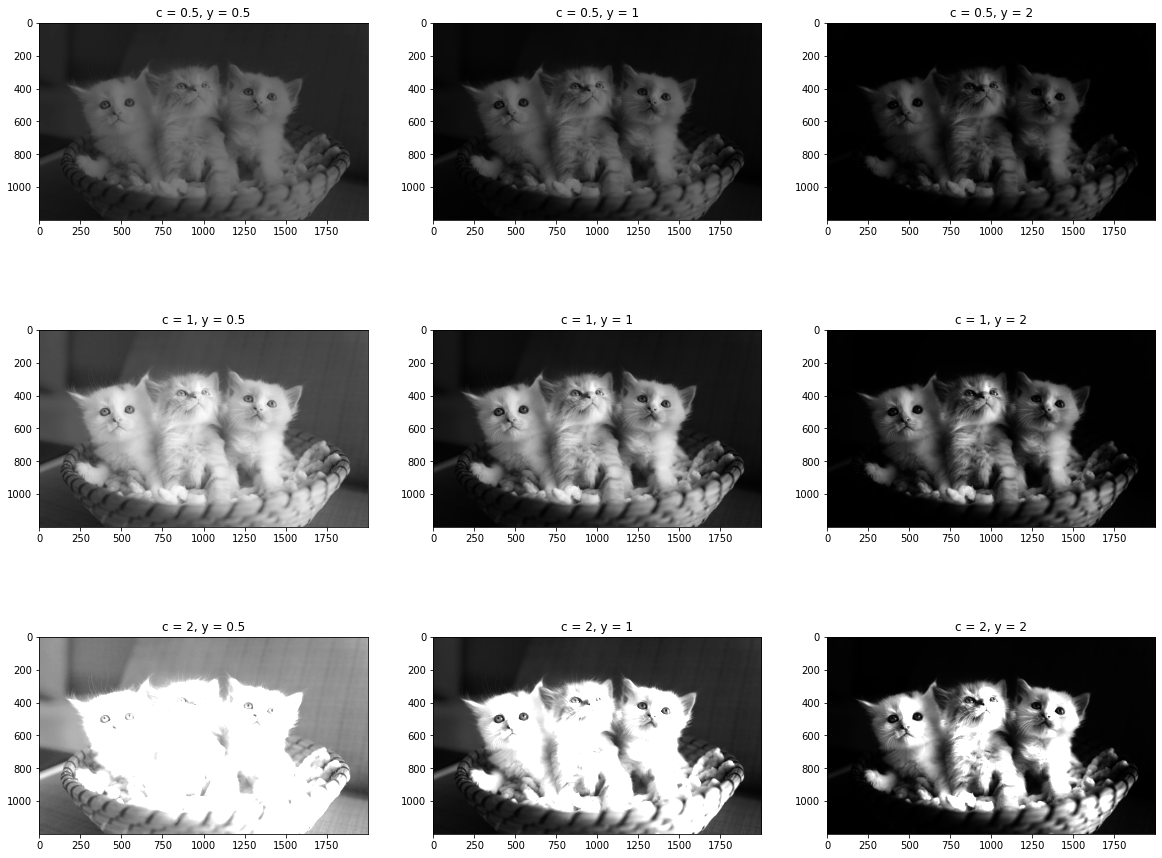

In [19]:
imageGray = np.asarray(image.convert('L'))
imageGray = imageGray * 1.0
imageGray = np.maximum(imageGray, 0.1)

# divide imageGray by 255 to make sure results stay in 0 - 255 range
imageGray = imageGray / 255
# we modify equation to  T(r) = 255 * c · r^γ,

plt.figure(figsize = [20, 16])

plt.subplot(3, 3, 1)
plt.title('c = 0.5, y = 0.5')
plt.imshow((255 * 0.5 * np.power(imageGray, 0.5)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 2)
plt.title('c = 0.5, y = 1')
plt.imshow((255 * 0.5 * np.power(imageGray, 1)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 3)
plt.title('c = 0.5, y = 2')
plt.imshow((255 * 0.5 * np.power(imageGray, 2)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 4)
plt.title('c = 1, y = 0.5')
plt.imshow((255 * 1 * np.power(imageGray, 0.5)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 5)
plt.title('c = 1, y = 1')
plt.imshow((255 * 1 * np.power(imageGray, 1)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 6)
plt.title('c = 1, y = 2')
plt.imshow((255 * 1 * np.power(imageGray, 2)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 7)
plt.title('c = 2, y = 0.5')
plt.imshow((255 * 2 * np.power(imageGray, 0.5)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 8)
plt.title('c = 2, y = 1')
plt.imshow((255 * 2 * np.power(imageGray, 1)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(3, 3, 9)
plt.title('c = 2, y = 2')
plt.imshow((255 * 2 * np.power(imageGray, 2)), cmap = 'gray', vmin = 0, vmax=255)

plt.show()

# Ćwiczenie 7
Wypróbuj działanie wyrównywania histogramu na przykładowych
obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy
zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu.

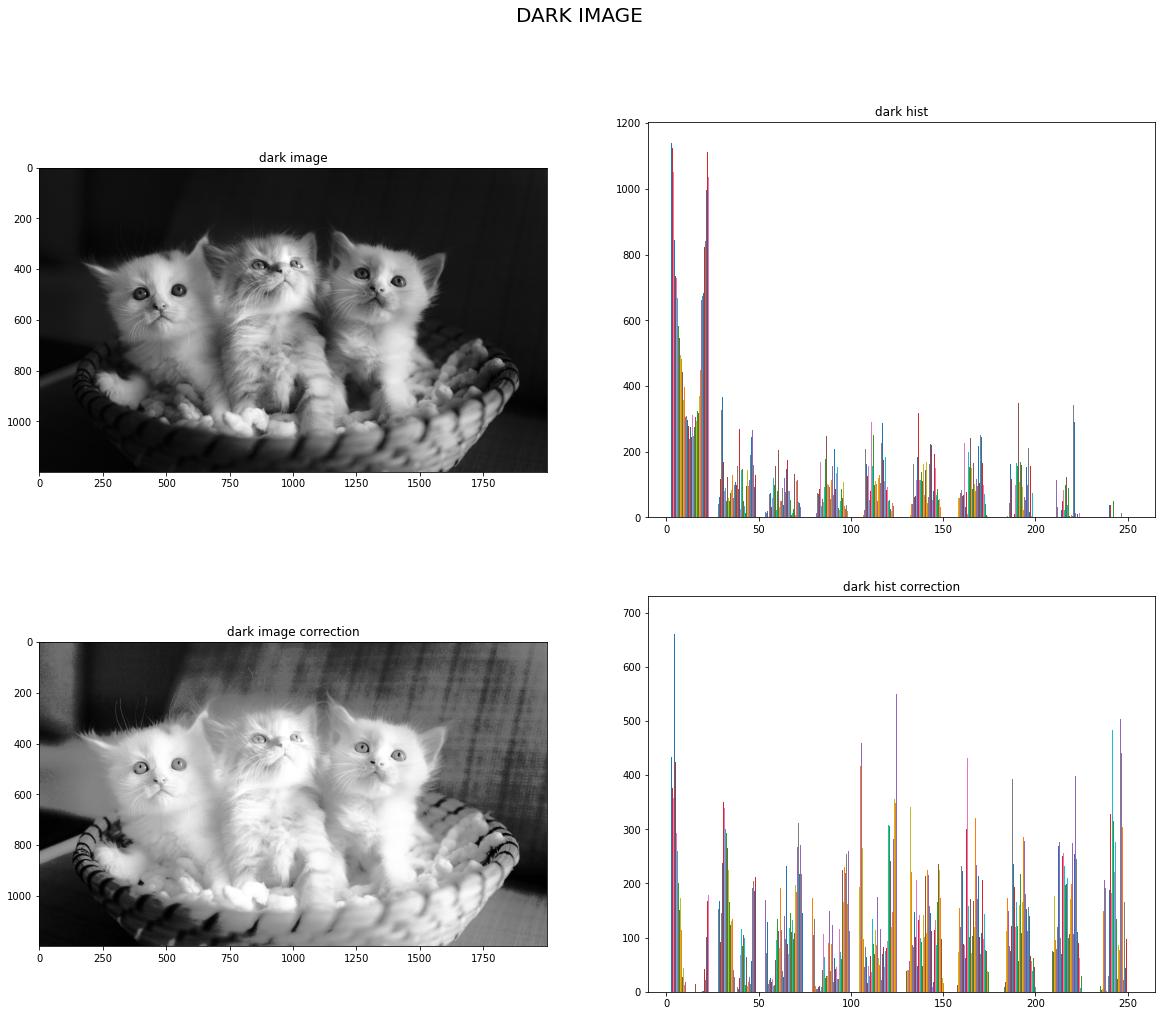

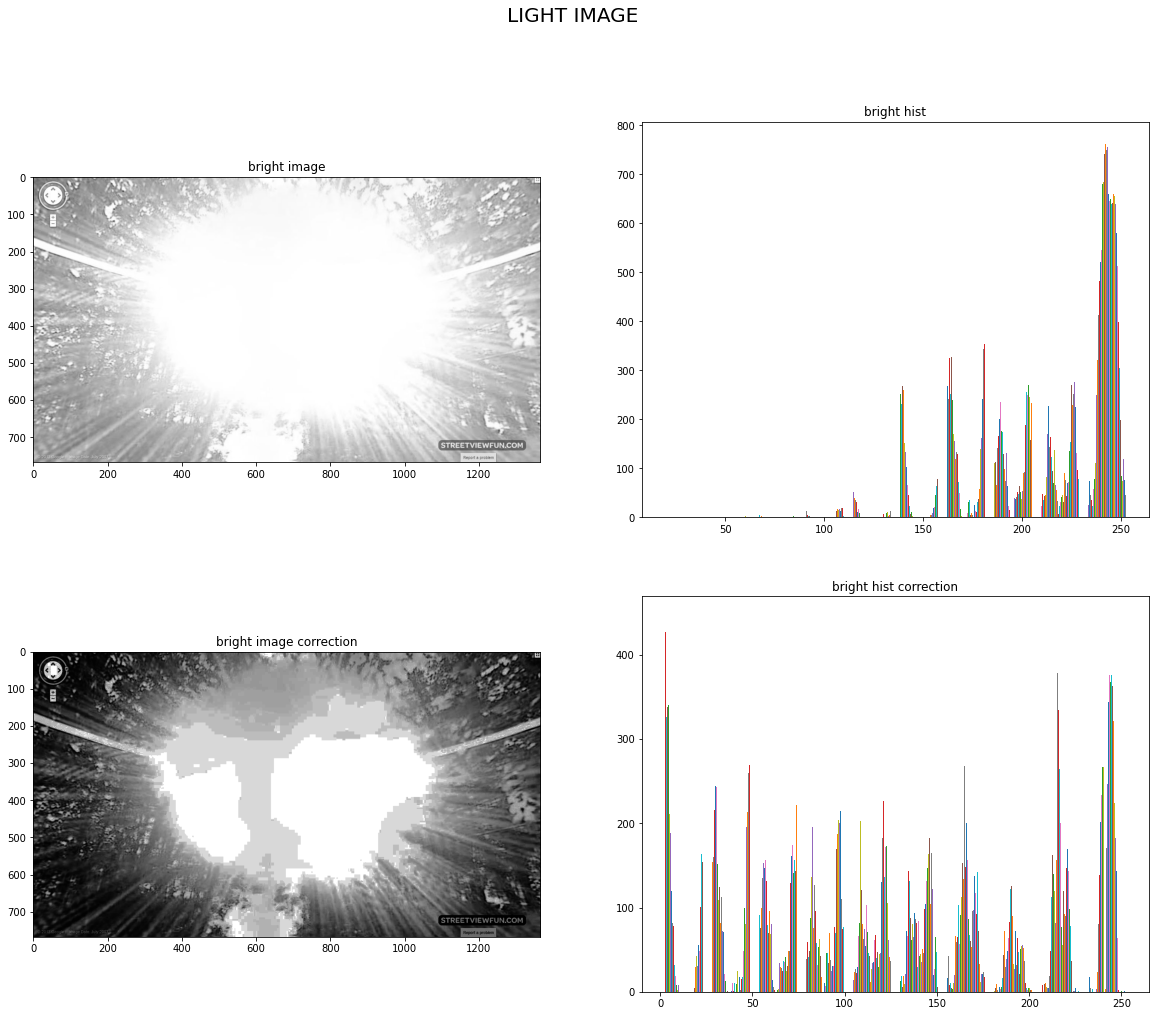

In [ ]:
%matplotlib inline

import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

fileName = '/content/Słodkie-kotki-dlaczego-kocięta-są-takie-słodkie.jpg'

darkImage = np.asarray(Image.open(fileName).convert('L'))

plt.figure(figsize = [20, 16])
plt.suptitle('DARK IMAGE', fontsize = 20)

plt.subplot(2, 2, 1)
plt.title('dark image')
plt.imshow(darkImage, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 2)
plt.title('dark hist')
plt.hist(darkImage)

correctedImage = cv.equalizeHist(darkImage)

plt.subplot(2, 2, 3)
plt.title('dark image correction')
plt.imshow(correctedImage, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 4)
plt.title('dark hist correction')
plt.hist(correctedImage)

plt.show()



fileName = '/content/its-too-bright.jpg'

brightImage = np.asarray(Image.open(fileName).convert('L'))

plt.figure(figsize = [20, 16])
plt.suptitle('LIGHT IMAGE', fontsize = 20)

plt.subplot(2, 2, 1)
plt.title('bright image')
plt.imshow(brightImage, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 2)
plt.title('bright hist')
plt.hist(brightImage)

correctedImage = cv.equalizeHist(brightImage)

plt.subplot(2, 2, 3)
plt.title('bright image correction')
plt.imshow(correctedImage, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 4)
plt.title('bright hist correction')
plt.hist(correctedImage)

plt.show()

# Ćwiczenie 8
Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą
1.   liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski rozmiaru 3 × 3
2.   nieliniowego filtra medianowego

Wykonaj eksperymenty dla różnych rozmiarów masek i wyciągnij wnioski.


In [ ]:
%matplotlib inline

import numpy as np  
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

## Część 1

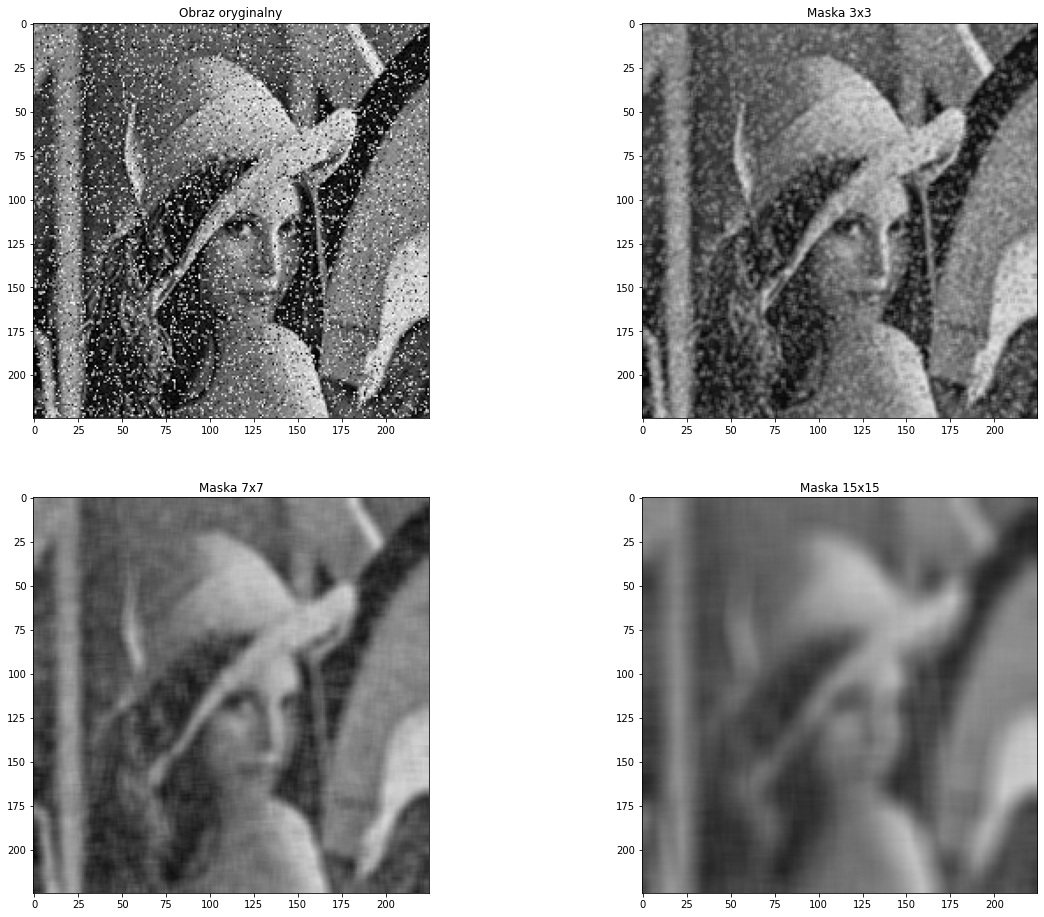

In [ ]:
fileName = '/content/download.jpg'

image = np.asarray(Image.open(fileName).convert('L'))

plt.figure(figsize = [20, 16])

plt.subplot(2, 2, 1)
plt.title("Obraz oryginalny")
plt.imshow(image, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 2)
plt.title("Maska 3x3")
plt.imshow(cv.blur(image, (3, 3)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 3)
plt.title("Maska 7x7")
plt.imshow(cv.blur(image, (7, 7)), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 4)
plt.title("Maska 15x15")
plt.imshow(cv.blur(image, (15, 15)), cmap = 'gray', vmin = 0, vmax=255)

plt.show()

## Część 2

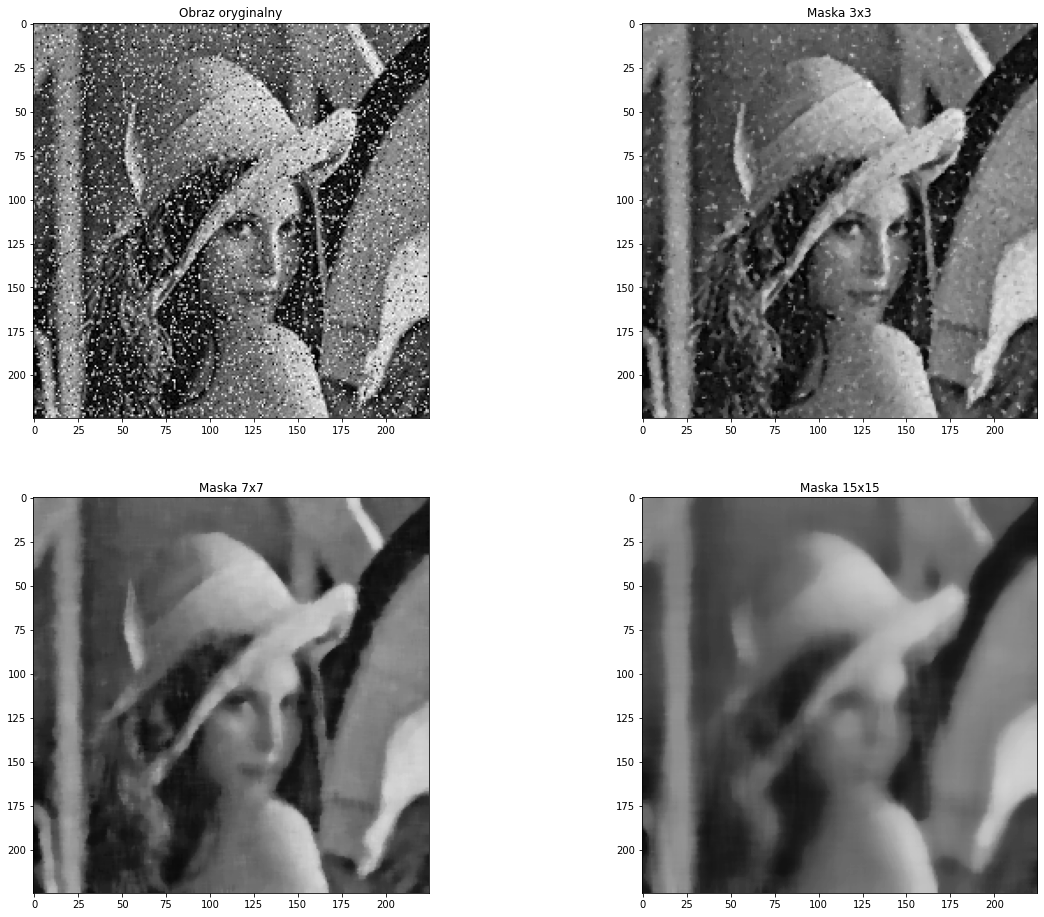

In [ ]:
fileName = '/content/download.jpg'

image = np.asarray(Image.open(fileName).convert('L'))

plt.figure(figsize = [20, 16])

plt.subplot(2, 2, 1)
plt.title("Obraz oryginalny")
plt.imshow(image, cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 2)
plt.title("Maska 3x3")
plt.imshow(cv.medianBlur(image, 3), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 3)
plt.title("Maska 7x7")
plt.imshow(cv.medianBlur(image, 7), cmap = 'gray', vmin = 0, vmax=255)

plt.subplot(2, 2, 4)
plt.title("Maska 15x15")
plt.imshow(cv.medianBlur(image, 15), cmap = 'gray', vmin = 0, vmax=255)

plt.show()